In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [59]:
dataset=pd.read_csv('Placement_Data_Full_Class.csv')
df=dataset.copy() # Making a copy to preserve the original data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# DATA PREPROCESSING

### Shape (no of rows and columns in dataset)

In [60]:
df.shape

(215, 15)

In [61]:
print('no of rows: ',df.shape[0])
print('no of rows: ',df.shape[1])

no of rows:  215
no of rows:  15


### NULL VALUES

In [62]:
df.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df.isnull().sum() # Checking for missing values

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [64]:
df=df.fillna(0) # Filling missing values with 0 for simplicity

In [65]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [66]:
 # Drop unnecessary columns 
df=df.drop(['sl_no','ssc_b','hsc_b'], axis=1)

### OUTLIER HANDLING

Text(0.5, 1.0, 'Under_graduate degree %')

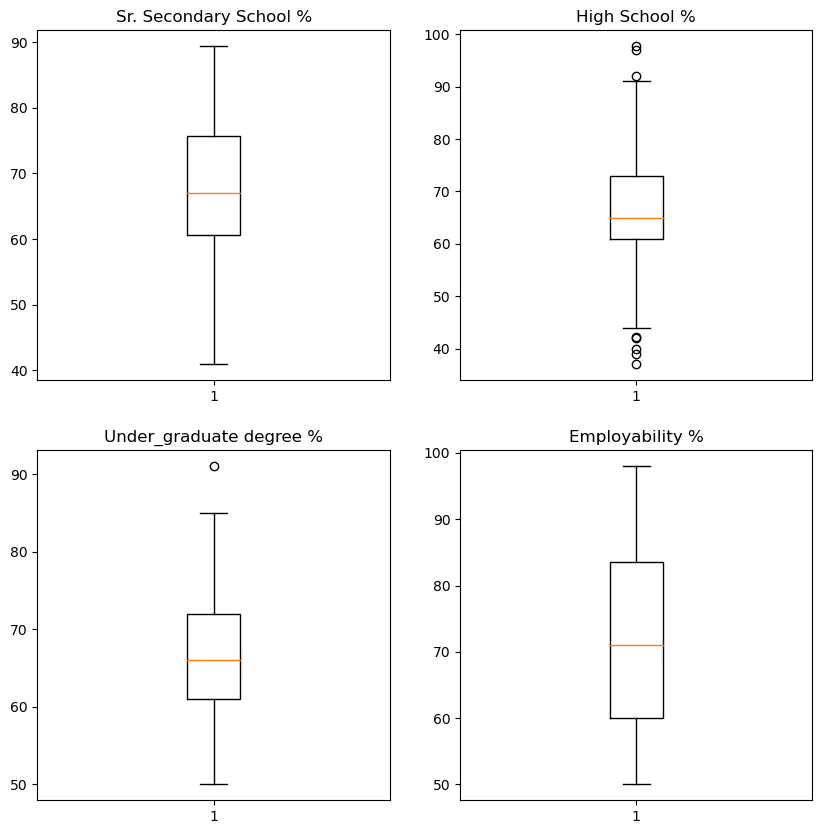

In [67]:
plt.figure(figsize=(10,10))

ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('High School %')

ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability %')


ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Sr. Secondary School %')


ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('Under_graduate degree %')

### Removing Outliers

In [68]:
Q1=df['hsc_p'].quantile(0.25)
Q3=df['hsc_p'].quantile(0.75)
Inter_Quartile_Range=Q3-Q1

filter=(df['hsc_p']>=Q1-1.5*Inter_Quartile_Range) & (df['hsc_p']<=Q3+1.5*Inter_Quartile_Range)
df_filter=df.loc[filter]

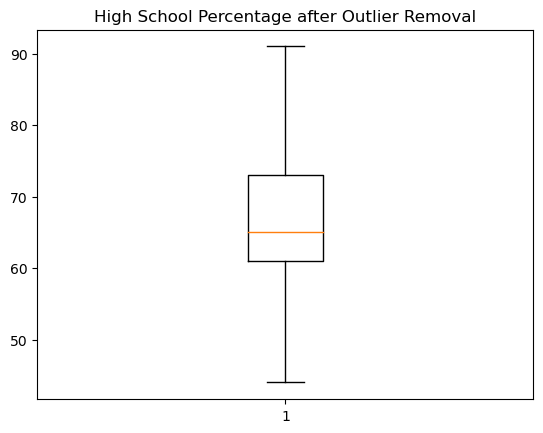

In [69]:
import matplotlib.pyplot as plt
plt.boxplot(df_filter['hsc_p'])
plt.title('High School Percentage after Outlier Removal')
plt.show()

# EDA

### DATA VISUALISATION

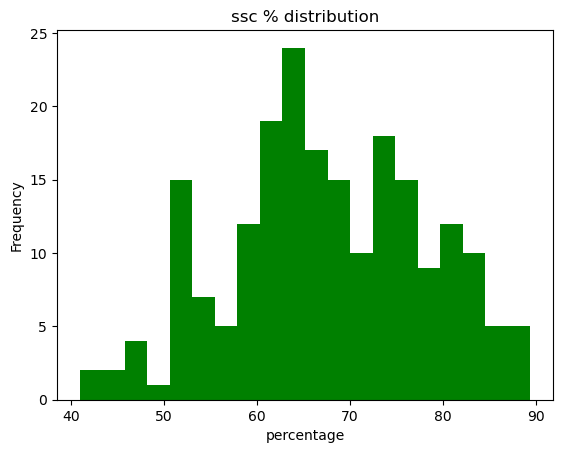

In [70]:
plt.hist(df_filter['ssc_p'],bins=20, color= 'green')
plt.title('ssc % distribution')
plt.xlabel('percentage')
plt.ylabel('Frequency')
plt.show()

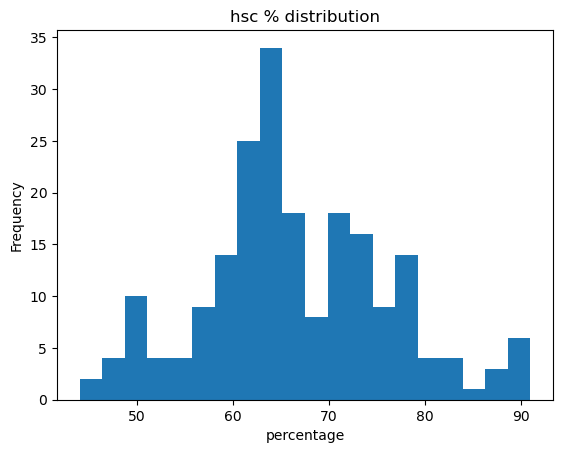

In [71]:
plt.hist(df_filter['hsc_p'],bins=20)
plt.title('hsc % distribution')
plt.xlabel('percentage')
plt.ylabel('Frequency')
plt.show()

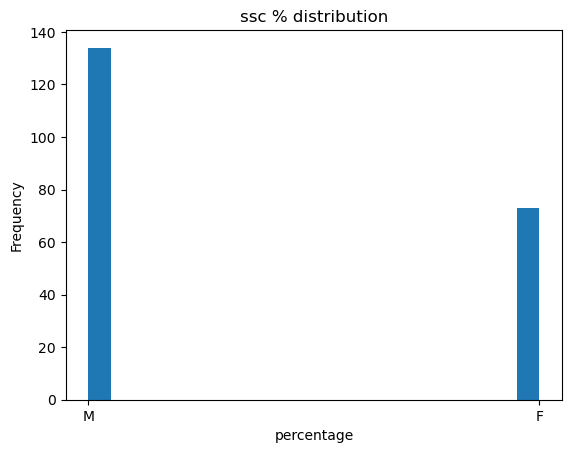

In [72]:
plt.hist(df_filter['gender'],bins=20)
plt.title('ssc % distribution')
plt.xlabel('percentage')
plt.ylabel('Frequency')
plt.show()

In [28]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='salary', ylabel='Density'>

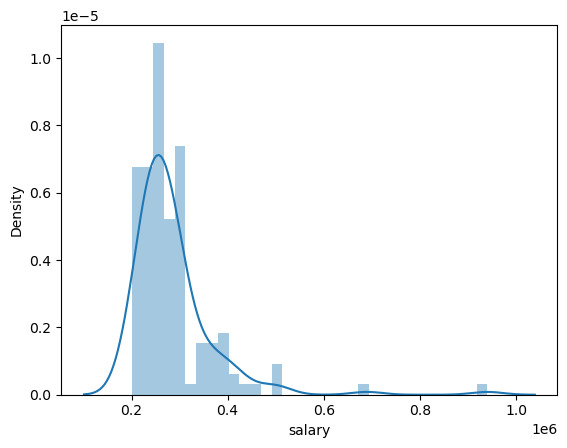

In [73]:
sns.distplot(df_filter[df_filter.salary!= 0]['salary'])

# ANALYZING PLACEMENT STATUS 

## GETTING INFORMATION & TOP STATISTICS ABOUT DATASET

In [74]:
print(df_filter.info())

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          207 non-null    object 
 1   ssc_p           207 non-null    float64
 2   hsc_p           207 non-null    float64
 3   hsc_s           207 non-null    object 
 4   degree_p        207 non-null    float64
 5   degree_t        207 non-null    object 
 6   workex          207 non-null    object 
 7   etest_p         207 non-null    float64
 8   specialisation  207 non-null    object 
 9   mba_p           207 non-null    float64
 10  status          207 non-null    object 
 11  salary          207 non-null    float64
dtypes: float64(6), object(6)
memory usage: 21.0+ KB
None


In [75]:
print(df_filter.describe())

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    67.561981   66.544783   66.388744   71.829662   62.284348   
std     10.654887    9.690330    7.277999   13.077954    5.739603   
min     40.890000   44.000000   50.000000   50.000000   51.290000   
25%     61.000000   61.000000   61.000000   60.000000   58.110000   
50%     67.000000   65.000000   66.000000   70.000000   62.000000   
75%     75.700000   73.000000   72.000000   82.830000   66.145000   
max     89.400000   91.000000   91.000000   98.000000   77.890000   

              salary  
count     207.000000  
mean   200294.685990  
std    150993.008006  
min         0.000000  
25%         0.000000  
50%    240000.000000  
75%    282500.000000  
max    940000.000000  


### NUMBER OF STUDENTS PLACED

In [76]:
df_filter['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [77]:
df_filter['status'].value_counts()

status
Placed        145
Not Placed     62
Name: count, dtype: int64

### SALARY OF TOP 5 SCI&TECH STUDENTS

In [78]:
df_filter.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary'],
      dtype='object')

In [79]:
placed_df=df_filter[(df_filter['degree_t']=='Sci&Tech') & (df_filter['status']=='Placed')]

In [80]:
placed_df.sort_values(by='salary',ascending=False).head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,M,71.00,58.66,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
174,M,73.24,50.83,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
77,M,64.00,80.00,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,M,63.00,67.00,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
53,M,80.00,70.00,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


### ENCODING CATEGORICAL DATA

In [81]:
df_filter.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [82]:
df_filter['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [83]:
df_filter['hsc_s']=df_filter['hsc_s'].map({'Science':2, 'Commerce':1,'Arts':0})

In [84]:
df_filter.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [85]:
df_filter['degree_t']=df_filter['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [86]:
df_filter['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
df_filter['workex']=df_filter['workex'].map({'Yes':1,'No':0})

In [88]:
df_filter['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [89]:
df_filter['specialisation']=df_filter['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [90]:
df_filter['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [91]:
df_filter['status']=df_filter['status'].map({'Placed':1,'Not Placed':0})

In [92]:
df_filter['gender'].unique()

array(['M', 'F'], dtype=object)

In [93]:
df_filter['gender']=df_filter['gender'].map({'M':1,'F':0})

In [94]:
df_filter.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,1,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,1,73.30,1,0,96.8,0,55.50,1,425000.0


In [95]:
df_filter=df_filter.drop(['salary'], axis=1)

# MACHINE LEARNING MODEL IMPLEMENTATION

### SEGREGATE THE INDEPENDENT(X) AND DEPENDENT VARIABLE(Y)

In [96]:
X=df_filter.drop('status',axis=1)
y=df_filter['status']

In [97]:
X

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,0,64.00,1,0,75.0,0,57.80
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43
4,1,85.80,73.60,1,73.30,1,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,1,0,91.0,0,74.49
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,1,73.00,1,1,59.0,0,69.72
213,0,74.00,66.00,1,58.00,1,0,70.0,1,60.23


In [98]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 207, dtype: int64

### SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### LOGISTIC REGRESSION MODEL

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred1=lr.predict(X_test)

### K-NEAREST NEIGHBORS (KNN)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred2=knn.predict(X_test)

### SUPPORT VECTOR MACHINE (SVM)

In [103]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

y_pred3=svm.predict(X_test)

### DECISION TREE CLASSIFIER

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred4=dt.predict(X_test)

### RANDOM FOREST CLASSIFIER

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred5=rf.predict(X_test)

### GRADIENT BOOSTING CLASSIFIER

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_pred6=gb.predict(X_test)

# MODEL EVALUATION & COMPARISION

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
score1=accuracy_score(y_test,y_pred1)

score2=accuracy_score(y_test,y_pred2)

score3=accuracy_score(y_test,y_pred3)

score4=accuracy_score(y_test,y_pred4)

score5=accuracy_score(y_test,y_pred5)

score6=accuracy_score(y_test,y_pred6)

In [109]:
# Assuming predictions are already made and stored
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, lr.predict(X_test)),
    'K-Nearest Neighbors': accuracy_score(y_test, knn.predict(X_test)),
    'Support Vector Machine': accuracy_score(y_test, svm.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, dt.predict(X_test)),
    'Random Forest': accuracy_score(y_test, rf.predict(X_test)),
    'Gradient Boosting': accuracy_score(y_test, gb.predict(X_test)),
}
accuracy_scores


{'Logistic Regression': 0.8571428571428571,
 'K-Nearest Neighbors': 0.7380952380952381,
 'Support Vector Machine': 0.7857142857142857,
 'Decision Tree': 0.7619047619047619,
 'Random Forest': 0.8809523809523809,
 'Gradient Boosting': 0.8333333333333334}

In [110]:
print("Accuracy via regression model: ",score1,'\n')

print("Accuracy via SVM model: ",score2,'\n')

print("Accuracy via KNN model: ",score3,'\n')

print("Accuracy via Decision Tree model: ",score4,'\n')

print("Accuracy via Random Forest model: ",score5,'\n')

print("Accuracy via Gradient Boosting model: ",score6,'\n')

Accuracy via regression model:  0.8571428571428571 

Accuracy via SVM model:  0.7380952380952381 

Accuracy via KNN model:  0.7857142857142857 

Accuracy via Decision Tree model:  0.7619047619047619 

Accuracy via Random Forest model:  0.8809523809523809 

Accuracy via Gradient Boosting model:  0.8333333333333334 



In [111]:
final_df=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'], 'Accuracy':[score1*100,score2*100,score3*100,score4*100,score5*100,score6*100]})

In [112]:
final_df

,Models,Accuracy
0,LR,85.714286
1,SVC,73.809524
2,KNN,78.571429
3,DT,76.190476
4,RF,88.095238
5,GB,83.333333


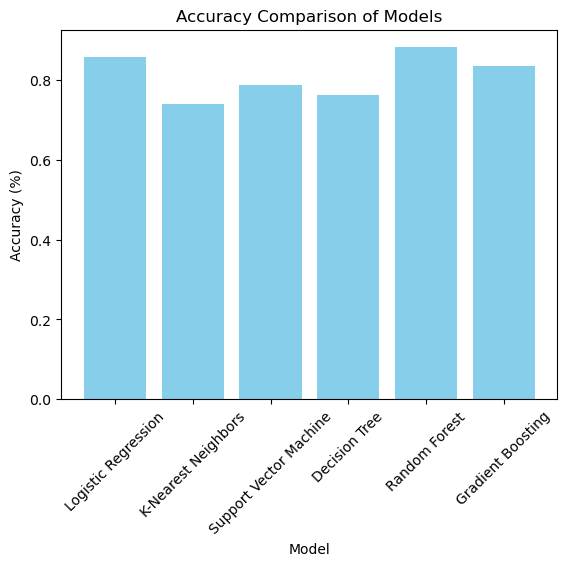

In [113]:
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()

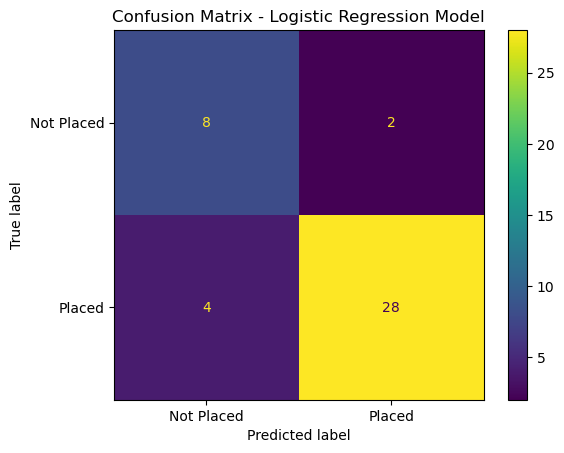

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, lr.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed']).plot()
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

# SAVING AND LOADING THE MODEL

In [115]:
import joblib

# Save the model using joblib
joblib.dump(lr,'model_campus_placement.pkl')

['model_campus_placement.pkl']

In [116]:
# Load the model
model = joblib.load('model_campus_placement.pkl')

# Prediction on new data

In [117]:
# Predicting placement for a new sample student
new_df=pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'hsc_p':91.0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
    'specialisation':1,
    'mba_p':58.8,
},index=[0])
new_model=model.predict(new_df)

prob=lr.predict_proba(new_df)
if new_model==1:
    print(f'Student is placed with the probability of {prob[0][1] * 100} %')
else:
    print(f'Student not placed with probability of {prob[0][0]}')


Student is placed with the probability of 87.0517546537722 %


# GRAPHICAL USER INTERFACE (GUI) FOR PREDICTION

In [118]:
from tkinter import *
import tkinter as tk
from tkinter import messagebox
from PIL import ImageTk, Image 

In [119]:
# Load the logistic regression model
model = joblib.load('placement_model.pkl')

# Function to predict placement based on input
def predict_placement():
    try:
        # Collect inputs from the user
        gender = int(gender_input.get())
        ssc_p = float(ssc_input.get())
        hsc_p = float(hsc_input.get())
        hsc_s = int(hsc_stream_input.get())
        degree_p = float(Degree_p_input.get())
        degree_t = int(degree_t_input.get())
        workex = int(work_exp_input.get())
        etest_p = float(E_test_p_input.get())
        specialisation = int(Specialisation_input.get())
        mba_p = float(MBA_p_input.get())

        # Create a dataframe for the new input
        new_data = pd.DataFrame({
            'gender': [gender],
            'ssc_p': [ssc_p],
            'hsc_p': [hsc_p],
            'hsc_s': [hsc_s],
            'degree_p': [degree_p],
            'degree_t': [degree_t],
            'workex': [workex],
            'etest_p': [etest_p],
            'specialisation': [specialisation],
            'mba_p': [mba_p]
        })

        # Use the model to predict
        prediction = model.predict(new_data)
        prob = model.predict_proba(new_data)

        # Display the result
        if prediction[0] == 1:
            result = f"Student is placed with a probability of {prob[0][1] * 100:.2f}%"
        else:
            result = f"Student is not placed with a probability of {prob[0][0] * 100:.2f}%"
        
        messagebox.showinfo("Prediction Result", result)
    
    except Exception as e:
        messagebox.showerror("Error", str(e))

In [120]:
# Create the tkinter window
root = tk.Tk()

# Set the title
root.title("PlacifyIQ : INSIGHTS FOR PLACEMENTS")
root.geometry('500x850')
root.configure(background='#0096DC')

img = Image.open("PlacifyIQ1.png")
resized_img = img.resize((180,180))
img = ImageTk.PhotoImage(resized_img)
img_label = Label(root, image=img)
img_label.pack(pady=(10,10))

text_label = Label(root,text='Campus Placement Prediction', fg='white',bg='#0096DC')
text_label.pack(pady=(5,5))
text_label.configure(font=('Arial',15))

gender_label=Label(root,text="Gender (1=Male, 0=Female):",fg='white',bg='#0096DC')
gender_label.pack(pady=(5,5))
gender_label.configure(font=('Arial',10))
gender_input=tk.Entry(root)
gender_input.pack()

ssc_label=Label(root,text="SSC Percentage:",fg='white',bg='#0096DC')
ssc_label.pack(pady=(5,5))
ssc_label.configure(font=('Arial',10))
ssc_input=tk.Entry(root)
ssc_input.pack()

hsc_label=Label(root,text="HSC Percentage:",fg='white',bg='#0096DC')
hsc_label.pack(pady=(5,5))
hsc_label.configure(font=('Arial',10))
hsc_input=tk.Entry(root)
hsc_input.pack()

hsc_stream_label=Label(root,text="HSC_stream (2=Science,1=Commerce, 0=Arts):",fg='white',bg='#0096DC')
hsc_stream_label.pack(pady=(5,5))
hsc_stream_label.configure(font=('Arial',10))
hsc_stream_input=tk.Entry(root)
hsc_stream_input.pack()

Degree_p_label=Label(root,text="Degree_percentage:",fg='white',bg='#0096DC')
Degree_p_label.pack(pady=(5,5))
Degree_p_label.configure(font=('Arial',10))
Degree_p_input=tk.Entry(root)
Degree_p_input.pack()

degree_t_label=Label(root,text="Degree type (2=Sci&Tech, 1=Comm&Mgmt, 0=Others):",fg='white',bg='#0096DC')
degree_t_label.pack(pady=(5,5))
degree_t_label.configure(font=('Arial',10))
degree_t_input=tk.Entry(root)
degree_t_input.pack()

work_exp_label=Label(root,text="work_experience (1=Yes, 0=No):",fg='white',bg='#0096DC')
work_exp_label.pack(pady=(5,5))
work_exp_label.configure(font=('Arial',10))
work_exp_input=tk.Entry(root)
work_exp_input.pack()

E_test_p_label=Label(root,text="E-test Percentage:",fg='white',bg='#0096DC')
E_test_p_label.pack(pady=(5,5))
E_test_p_label.configure(font=('Arial',10))
E_test_p_input=tk.Entry(root)
E_test_p_input.pack()

Specialisation_label=Label(root,text="Specialisation (1=Mkt & HR, 0=Mkt & Fin):",fg='white',bg='#0096DC')
Specialisation_label.pack(pady=(5,5))
Specialisation_label.configure(font=('Arial',10))
Specialisation_input=tk.Entry(root)
Specialisation_input.pack()

MBA_p_label=Label(root,text="MBA Percentage:",fg='white',bg='#0096DC')
MBA_p_label.pack(pady=(5,5))
MBA_p_label.configure(font=('Arial',10))
MBA_p_input=tk.Entry(root)
MBA_p_input.pack()

predict_btn=Button(root,text='Predict',bg='white',fg='black', width=45, command=predict_placement)
predict_btn.pack(pady=(10,20))
predict_btn.configure(font=('verdana',10))

root.mainloop()